In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.2
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [17]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [19]:
history1 = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
#history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/30
943/943 [==============================] - 6s 4ms/step - loss: 0.4228 - accuracy: 0.8076 - val_loss: 0.3516 - val_accuracy: 0.8414
Epoch 2/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3386 - accuracy: 0.8455 - val_loss: 0.3342 - val_accuracy: 0.8463
Epoch 3/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3287 - accuracy: 0.8483 - val_loss: 0.3290 - val_accuracy: 0.8469
Epoch 4/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3234 - accuracy: 0.8498 - val_loss: 0.3259 - val_accuracy: 0.8505
Epoch 5/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3214 - accuracy: 0.8505 - val_loss: 0.3313 - val_accuracy: 0.8453
Epoch 6/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3199 - accuracy: 0.8505 - val_loss: 0.3223 - val_accuracy: 0.8497
Epoch 7/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3179 - accuracy: 0.8519 - val_loss: 0.3217 - val_accuracy: 0.8499
Epoch 

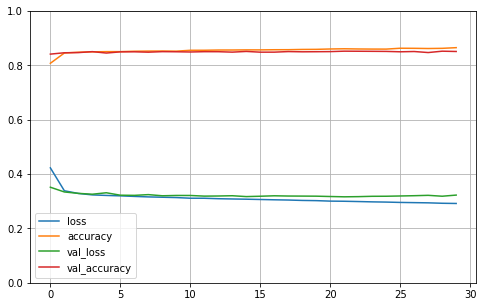

In [20]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3227 - accuracy: 0.8511


[0.322709858417511, 0.8510624170303345]

In [22]:
from sklearn import metrics
metrics.accuracy_score(y_true= y_test, y_pred= (model.predict(X_test)>0.5))

0.851062416998672

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [13]:
from sklearn.preprocessing import StandardScaler

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)

X_test = standard_scaler.transform(X_test)

In [14]:
history2 = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
943/943 [==============================] - 6s 6ms/step - loss: 0.3660 - accuracy: 0.8278 - val_loss: 0.3366 - val_accuracy: 0.8445
Epoch 2/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3275 - accuracy: 0.8482 - val_loss: 0.3310 - val_accuracy: 0.8468
Epoch 3/30
943/943 [==============================] - 3s 3ms/step - loss: 0.3226 - accuracy: 0.8493 - val_loss: 0.3292 - val_accuracy: 0.8452
Epoch 4/30
943/943 [==============================] - 4s 4ms/step - loss: 0.3196 - accuracy: 0.8509 - val_loss: 0.3276 - val_accuracy: 0.8457
Epoch 5/30
943/943 [==============================] - 4s 4ms/step - loss: 0.3172 - accuracy: 0.8515 - val_loss: 0.3278 - val_accuracy: 0.8449
Epoch 6/30
943/943 [==============================] - 4s 4ms/step - loss: 0.3155 - accuracy: 0.8517 - val_loss: 0.3272 - val_accuracy: 0.8458
Epoch 7/30
943/943 [==============================] - 3s 4ms/step - loss: 0.3136 - accuracy: 0.8528 - val_loss: 0.3273 - val_accuracy: 0.8463
Epoch 

# Zad. 
Stwórz wykres porównujący metody. 

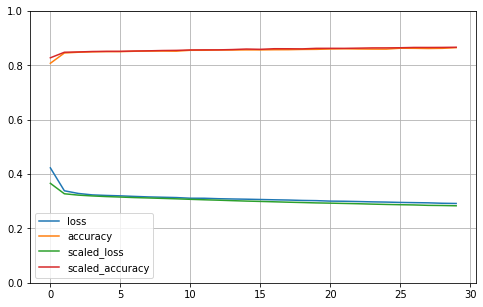

In [23]:
history1.history['scaled_loss'] = history2.history['loss']
history1.history['scaled_accuracy'] = history2.history['accuracy']

#history1.history.drop(['val_loss','val_accuracy'], axis=1, inplace=True)
del history1.history['val_loss']
del history1.history['val_accuracy']

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()